In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from env import username, password, get_db_url

# db_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'
# df = pd.read_sql('SELECT * FROM customers', db_url)  


### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### - Has the network latency gone up since we switched internet service providers?

H0 - ISP has no effect on internet latency

H1 - Network latency has increased after we switched ISP

True Positive - Our network latency increased after we switched

True Negative - there was no change in network latency between ISPs

Type 1 - Our network latency did not increase BUT we rejected the H0

Type 2 - Our network latency did increase BUT we accepted H0

#### - Is the website redesign any good?

H0 - There was no change in customer engagement after our website redesign

H1 - There was an increase in customer engagement after our website redesign

True Positive - Customer engagement DID increase after our website redesign

True Negative - Customer engagement DID NOT increase after our website redesign

Type 1 - Customer engagement DID NOT increase BUT we rejected the H0

Type 2 - Customer engagement DID increase BUT we accepted H0

#### - Is our television ad driving more sales?

H0 - Our television ad had no effect on our sales

H1 - Our television ad increased sales

True Positive - Sales DID increase after our television ad

True Negative - Sales DID NOT increase after our television ad

Type 1 - Sales DID NOT increase BUT we rejected the H0

Type 2 - Sales DID increase BUT we accepted H0

### 1. Answer with the type of test you would use (assume normal distribution):

* Is there a difference in grades of students on the second floor compared to grades of all students?

A.) One sample t-test : 2 tails

* Are adults who drink milk taller than adults who dont drink milk?

A.) 2 Sample t-test : 1 tail

* Is the the price of gas higher in texas or in new mexico?

A.) 2 Sample t-test : 1 tail

* Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

A.) ANOVA

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 

### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [ ]:
# sample_1 = 40
# mean_1 = 90 days
# std_1 = 15 days

# sample_2 = 50
# mean_2 = 100 days
# std_2 = 20 days

# alpha = 0.05

$H{0}$ : There is no difference in average time to sell a home between its 2 office locations.

$H{a}$ : There is a difference in average time to sell a home between its 2 office locations.

In [218]:
a = 0.05

In [9]:
mean_1 = 90 
std_1 = 15

mean_2 = 100
std_2 = 20

In [28]:
dist_1 = stats.norm(mean_1, std_1)
samples_1 = dist_1.rvs(size=40)

In [29]:
dist_2 = stats.norm(mean_2, std_2)
samples_2 = dist_2.rvs(size=50)

In [46]:
samples_1

array([ 70.4656141 , 104.02749578,  69.93747671, 102.90061442,
        92.50084322,  62.09454385,  82.36939815,  92.82707504,
        64.913909  ,  79.76367128,  85.3878516 , 107.86620985,
       109.50073031,  63.36848813, 103.66236889,  67.5417149 ,
        80.32407054, 107.47412082,  92.71880657,  74.49640955,
        70.80093793,  95.19070875,  66.05280106,  92.51373874,
       102.02313906,  85.56005751,  67.57143841, 125.96014229,
       104.53531959,  98.58395177,  89.31519946,  88.25388882,
        94.75075084, 104.40679668, 100.01727905,  99.89804424,
       107.54719295,  90.02065566,  82.4395914 , 106.33410785])

In [40]:
mean_a = samples_1.mean()

89.64792886977986

In [42]:
mean_b = samples_2.mean()

98.8762476751998

In [44]:
stat, pval = stats.levene(samples_1, samples_2)
stat, pval

(2.5079974756696437, 0.1168571918778397)

In [47]:
t, p = stats.ttest_ind(samples_1, samples_2, equal_var=True)
t, p

(-2.359034653312221, 0.020535978972365594)

In [219]:
if p < a:
    print('reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

reject the null hypothesis


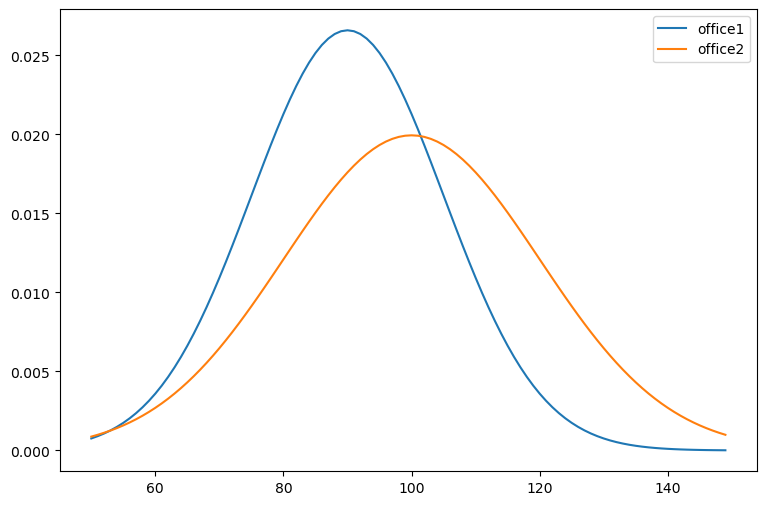

In [200]:
x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'office1')
plt.plot(x, y2, label = 'office2')
plt.legend()

t-test from stats - 9 times out of 10 we won't use this below

In [220]:
stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

### 3. Load the mpg dataset and use it to answer the following questions:

In [48]:
# mpg = sns.load_dataset('mpg')

In [63]:
from pydataset import data
mpg = data('mpg')

In [67]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

$H{0}$ : There is no difference in fuel-efficiency in cars from 2008 vs 1999

$H{a}$ : There is a difference in fuel-efficiency in cars from 2008 vs 1999

In [77]:
mpg['avg_mpg'] = (mpg.cty + mpg.hwy)/2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [93]:
mpg.groupby('year').avg_mpg.mean()

year
1999    20.222222
2008    20.076923
Name: avg_mpg, dtype: float64

In [125]:
avg_mpg_99 = mpg[mpg['year'] == 1999].avg_mpg.mean()
avg_mpg_99

20.22222222222222

In [126]:
avg_mpg_08 = mpg[mpg['year'] == 2008].avg_mpg.mean()
avg_mpg_08

20.076923076923077

In [127]:
mpg[mpg['year'] == 1999].avg_mpg.var()

27.122605363984682

In [128]:
mpg[mpg['year'] == 2008].avg_mpg.var()

24.097480106100797

In [132]:
mpg_99 = mpg[mpg['year'] == 1999].avg_mpg

In [133]:
mpg_08 = mpg[mpg['year'] == 2008].avg_mpg

In [135]:
stat, pval = stats.levene(mpg_99, mpg_08)
stat, pval

(0.033228136671080453, 0.855517569468803)

In [223]:
t, p = stats.ttest_ind(mpg_99, mpg_08, equal_var=False)
t, p

(0.21960177245940962, 0.8263750772060638)

We cannot reject $H{0}$

In [224]:
if p < a:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


<AxesSubplot:>

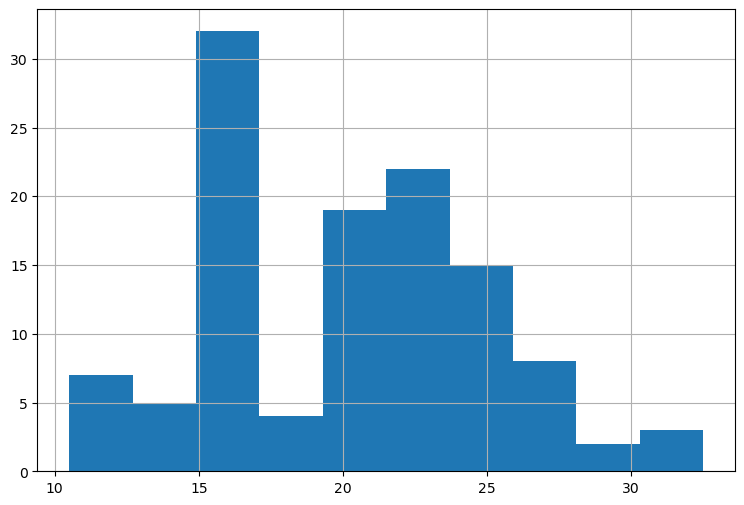

In [221]:
plt.figure(figsize=(9,6))
mpg_08.hist()

<AxesSubplot:>

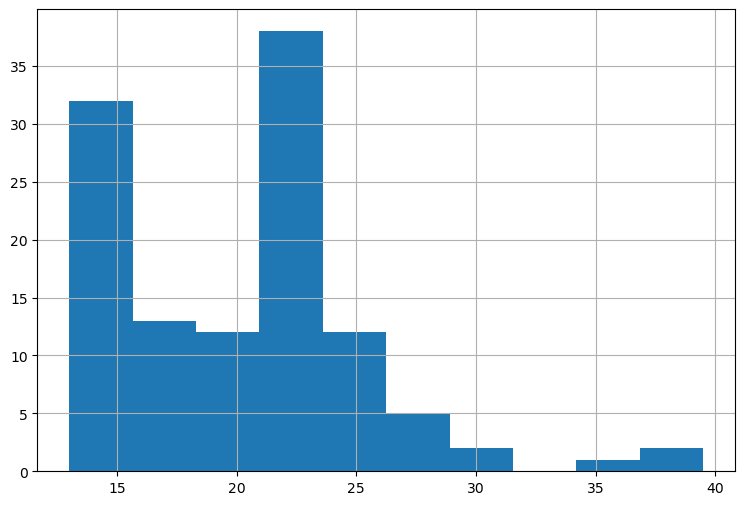

In [222]:
plt.figure(figsize=(9,6))
mpg_99.hist()

#### Are compact cars more fuel-efficient than the average car?

$H{0}$ : There is no difference in fuel-efficiency in compact cars vs the average car.

$H{a}$ : Compact cars are more fuel-efficient than the average car.

In [143]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [152]:
mpg[mpg['class']=='compact'].head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [153]:
mpg[mpg['class']=='compact']['avg_mpg'].mean()

24.21276595744681

In [156]:
mpg.avg_mpg.mean()

20.14957264957265

In [161]:
avg_com_mpg = mpg[mpg['class']=='compact']['avg_mpg']

In [162]:
avg_car_mpg = mpg.avg_mpg

In [163]:
stat, pval = stats.levene(avg_com_mpg, avg_car_mpg)
stat, pval

(11.96025508756341, 0.0006283349942996054)

In [226]:
t, p = stats.ttest_1samp(avg_com_mpg, mpg.avg_mpg.mean())
t, p/2

(7.896888573132533, 2.0992818971585743e-10)

We can reject $H{0}$

<AxesSubplot:>

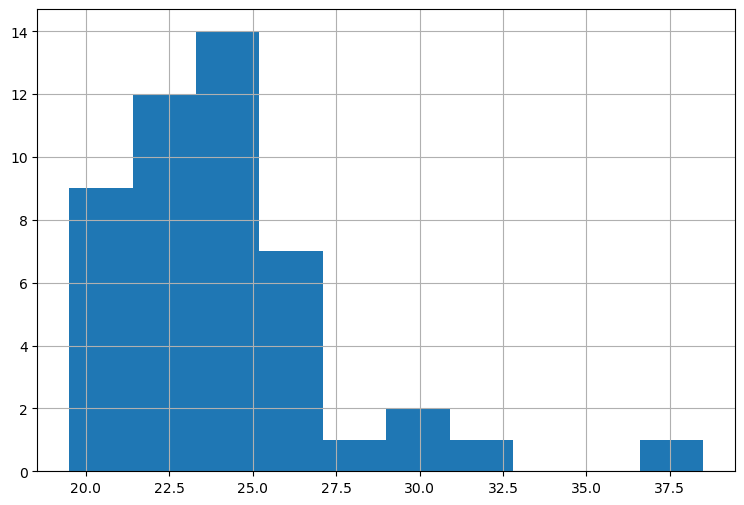

In [225]:
plt.figure(figsize=(9,6))
avg_com_mpg.hist()

In [227]:
if ((p/2) < a) and (t > 0):
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


#### Do manual cars get better gas mileage than automatic cars?

$H{0}$ : There is no difference in fuel-efficiency in automatic vs manual cars.

$H{a}$ : There is a difference in fuel-efficiency in automatic vs manual cars.

In [169]:
mpg['is_automatic'] = mpg.trans.str.contains('auto')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False


In [173]:
mpg[mpg['is_automatic']].avg_mpg.mean()

19.130573248407643

In [192]:
mpg[mpg['is_automatic']==0].avg_mpg.mean()

22.227272727272727

In [193]:
auto_mpg = mpg[mpg['is_automatic']].avg_mpg

In [194]:
manual_mpg = mpg[mpg['is_automatic']==0].avg_mpg

In [195]:
stat, pval = stats.levene(auto_mpg, manual_mpg)
stat, pval

(0.20075824847529639, 0.6545276355131857)

In [232]:
t, p = stats.ttest_ind(auto_mpg, manual_mpg, equal_var=True)
t, p/2

(-4.593437735750014, 3.5771872005728424e-06)

We can reject $H{0}$

In [233]:
if p < a:
    print('we can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


<AxesSubplot:>

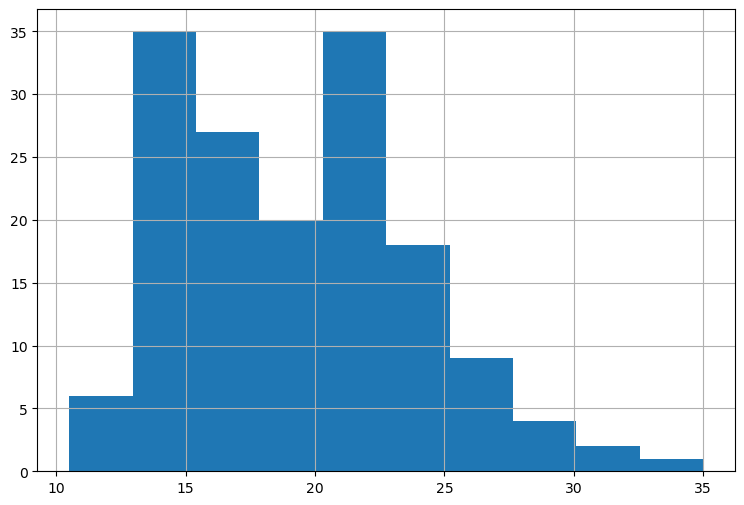

In [228]:
plt.figure(figsize=(9,6))
auto_mpg.hist()

<AxesSubplot:>

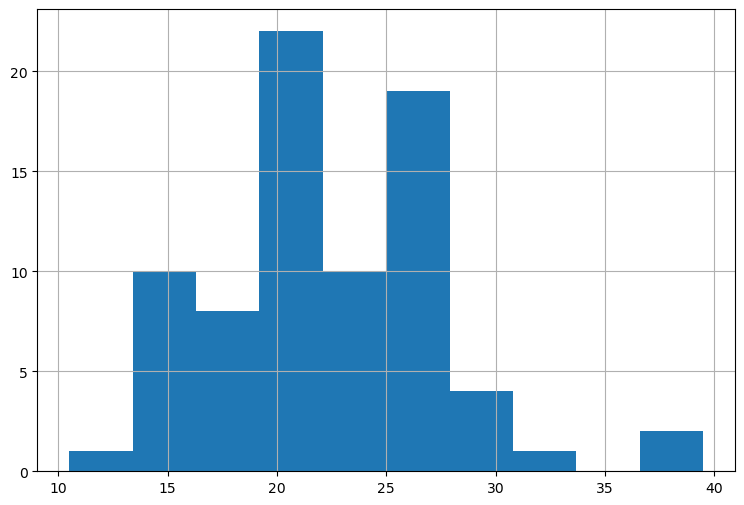

In [229]:
plt.figure(figsize=(9,6))
manual_mpg.hist()